<a href="https://colab.research.google.com/github/matthew-sessions/DS-Unit-2-Regression-Classification/blob/master/module3/assignment_regression_classification_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 3

## Assignment

We're going back to our other **New York City** real estate dataset. Instead of predicting apartment rents, you'll predict property sales prices.

But not just for condos in Tribeca...

Instead, predict property sales prices for **One Family Dwellings** (`BUILDING_CLASS_CATEGORY` == `'01 ONE FAMILY DWELLINGS'`) using a subset of the data where the **sale price was more than \\$100 thousand and less than $2 million.** 

The [NYC Department of Finance](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page) has a glossary of property sales terms and NYC Building Class Code Descriptions. The data comes from the [NYC OpenData](https://data.cityofnewyork.us/browse?q=NYC%20calendar%20sales) portal.


- [X] Do train/test split. Use data from January — March 2019 to train. Use data from April 2019 to test.
- [X] Do exploratory visualizations with Seaborn.
- [X] Do one-hot encoding of categorical features.
- [X] Do feature selection with `SelectKBest`.
- [X] Fit a linear regression model with multiple features.
- [X] Get mean absolute error for the test set.
- [X] As always, commit your notebook to your fork of the GitHub repo.


## Stretch Goals
- [ ] Add your own stretch goal(s) !
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Learn more about feature selection:
    - ["Permutation importance"](https://www.kaggle.com/dansbecker/permutation-importance)
    - [scikit-learn's User Guide for Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html)
    - [mlxtend](http://rasbt.github.io/mlxtend/) library
    - scikit-learn-contrib libraries: [boruta_py](https://github.com/scikit-learn-contrib/boruta_py) & [stability-selection](https://github.com/scikit-learn-contrib/stability-selection)
    - [_Feature Engineering and Selection_](http://www.feat.engineering/) by Kuhn & Johnson.
- [ ] Try [statsmodels](https://www.statsmodels.org/stable/index.html) if you’re interested in more inferential statistical approach to linear regression and feature selection, looking at p values and 95% confidence intervals for the coefficients.
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapters 1-3, for more math & theory, but in an accessible, readable way (without an excessive amount of formulas or academic pre-requisites).
(That book is good regardless of whether your cultural worldview is inferential statistics or predictive machine learning)
- [ ] Read Leo Breiman's paper, ["Statistical Modeling: The Two Cultures"](https://projecteuclid.org/download/pdf_1/euclid.ss/1009213726)
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html):

> Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves multiple purposes here:

> - **Convenience and encapsulation.** You only have to call fit and predict once on your data to fit a whole sequence of estimators.
> - **Joint parameter selection.** You can grid search over parameters of all estimators in the pipeline at once.
> - **Safety.** Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.

In [0]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module3')

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import pandas as pd


# Read New York City property sales data
df = pd.read_csv('https://raw.githubusercontent.com/matthew-sessions/DS-Unit-2-Regression-Classification/master/data/NYC_Citywide_Rolling_Calendar_Sales.csv')

# Change column names: replace spaces with underscores
df.columns = [col.replace(' ', '_') for col in df]

# SALE_PRICE was read as strings.
# Remove symbols, convert to integer
df['SALE_PRICE'] = (
    df['SALE_PRICE']
    .str.replace('$','')
    .str.replace('-','')
    .str.replace(',','')
    .astype(int)
)

In [0]:
import numpy as np

df = df[np.isfinite(df['YEAR_BUILT'])]

In [0]:
df.dtypes

BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING_CLASS_CATEGORY            object
TAX_CLASS_AT_PRESENT               object
BLOCK                               int64
LOT                                 int64
EASE-MENT                         float64
BUILDING_CLASS_AT_PRESENT          object
ADDRESS                            object
APARTMENT_NUMBER                   object
ZIP_CODE                          float64
RESIDENTIAL_UNITS                 float64
COMMERCIAL_UNITS                  float64
TOTAL_UNITS                       float64
LAND_SQUARE_FEET                   object
GROSS_SQUARE_FEET                 float64
YEAR_BUILT                        float64
TAX_CLASS_AT_TIME_OF_SALE           int64
BUILDING_CLASS_AT_TIME_OF_SALE     object
SALE_PRICE                          int32
SALE_DATE                          object
dtype: object

In [0]:
df.isna().sum()


BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING_CLASS_CATEGORY               0
TAX_CLASS_AT_PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                         23005
BUILDING_CLASS_AT_PRESENT             0
ADDRESS                               0
APARTMENT_NUMBER                  17837
ZIP_CODE                              0
RESIDENTIAL_UNITS                     0
COMMERCIAL_UNITS                      0
TOTAL_UNITS                           0
LAND_SQUARE_FEET                     52
GROSS_SQUARE_FEET                     0
YEAR_BUILT                            0
TAX_CLASS_AT_TIME_OF_SALE             0
BUILDING_CLASS_AT_TIME_OF_SALE        0
SALE_PRICE                            0
SALE_DATE                             0
dtype: int64

In [0]:
df =  df.drop(columns=['EASE-MENT','APARTMENT_NUMBER'])

In [0]:
df = df.dropna()

In [0]:
df.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING_CLASS_CATEGORY           0
TAX_CLASS_AT_PRESENT              0
BLOCK                             0
LOT                               0
BUILDING_CLASS_AT_PRESENT         0
ADDRESS                           0
ZIP_CODE                          0
RESIDENTIAL_UNITS                 0
COMMERCIAL_UNITS                  0
TOTAL_UNITS                       0
LAND_SQUARE_FEET                  0
GROSS_SQUARE_FEET                 0
YEAR_BUILT                        0
TAX_CLASS_AT_TIME_OF_SALE         0
BUILDING_CLASS_AT_TIME_OF_SALE    0
SALE_PRICE                        0
SALE_DATE                         0
dtype: int64

In [0]:
df.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING_CLASS_CATEGORY           0
TAX_CLASS_AT_PRESENT              0
BLOCK                             0
LOT                               0
BUILDING_CLASS_AT_PRESENT         0
ADDRESS                           0
ZIP_CODE                          0
RESIDENTIAL_UNITS                 0
COMMERCIAL_UNITS                  0
TOTAL_UNITS                       0
LAND_SQUARE_FEET                  0
GROSS_SQUARE_FEET                 0
YEAR_BUILT                        0
TAX_CLASS_AT_TIME_OF_SALE         0
BUILDING_CLASS_AT_TIME_OF_SALE    0
SALE_PRICE                        0
SALE_DATE                         0
dtype: int64

In [0]:
df = df[df.COMMERCIAL_UNITS != -148]

In [0]:
df = df[df.COMMERCIAL_UNITS != -1]

In [0]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,716,1246,R4,"447 WEST 18TH STREET, PH12A",10011.0,1.0,0.0,1.0,"10,733",1979.0,2007.0,2,R4,0,01/01/2019
1,1,FASHION,21 OFFICE BUILDINGS,4,812,68,O5,144 WEST 37TH STREET,10018.0,0.0,6.0,6.0,"2,962",15435.0,1920.0,4,O5,0,01/01/2019
2,1,FASHION,21 OFFICE BUILDINGS,4,839,69,O5,40 WEST 38TH STREET,10018.0,0.0,7.0,7.0,"2,074",11332.0,1930.0,4,O5,0,01/01/2019
3,1,GREENWICH VILLAGE-WEST,13 CONDOS - ELEVATOR APARTMENTS,2,592,1041,R4,"1 SHERIDAN SQUARE, 8C",10014.0,1.0,0.0,1.0,0,500.0,0.0,2,R4,0,01/01/2019
4,1,UPPER EAST SIDE (59-79),15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,1379,1402,R1,"20 EAST 65TH STREET, B",10065.0,1.0,0.0,1.0,0,6406.0,0.0,2,R1,0,01/01/2019


In [0]:
df.describe()

,BOROUGH,BLOCK,LOT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE
count,22938.000000,22938.000000,22938.000000,22938.000000,22938.000000,22938.000000,22938.000000,2.293800e+04,22938.000000,22938.000000,2.293800e+04
mean,2.980949,4467.205598,350.330630,10791.060075,1.810358,0.285465,2.263798,3.422221e+03,1819.185282,1.621676,1.318000e+06
std,1.258925,3715.894306,626.887989,1105.137318,10.002452,5.484388,11.962164,2.192062e+04,489.000443,0.802862,1.019149e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,2.000000,1345.000000,21.000000,10306.000000,0.000000,0.000000,1.000000,4.930000e+02,1920.000000,1.000000,0.000000e+00
50%,3.000000,3559.000000,49.000000,11211.000000,1.000000,0.000000,1.000000,1.356000e+03,1940.000000,1.000000,4.500000e+05
75%,4.000000,6678.000000,326.750000,11360.000000,2.000000,0.000000,2.000000,2.280000e+03,1965.000000,2.000000,8.750000e+05
max,5.000000,16350.000000,9057.000000,11697.000000,750.000000,570.000000,755.000000,1.303935e+06,2019.000000,4.000000,8.500000e+08


In [0]:
df[df.SALE_PRICE == 850000000]

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
7745,1,FASHION,22 STORE BUILDINGS,4,840,42,K3,424 5 AVENUE,10018.0,0.0,4.0,4.0,"51,271",697029.0,1920.0,4,K3,850000000,02/08/2019


In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
def make(df,y,x):
  X = df[x]
  y = df[y]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
  model = LinearRegression()
  model.fit(X_train,y_train)
  coef = model.coef_
  intercept = model.intercept_
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  r2score = r2_score(y_test,y_pred)
  r2score_train = r2_score(y_train, y_pred_train)
  print('Coef = ' +str(coef[0]) + '   intercept = '+str(intercept))
  print('')
  print('R-score for test '+str(r2score))
  print('R-score for train '+str(r2score_train))
  print('')
  print('MAE TEST ' + str(mean_absolute_error(y_test,y_pred)))
  print('MAE TRAIN ' + str(mean_absolute_error(y_train,y_pred_train)))


In [0]:
features = df[['YEAR_BUILT','ZIP_CODE','COMMERCIAL_UNITS','GROSS_SQUARE_FEET','BOROUGH']]
target = df['SALE_PRICE']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

In [0]:
features = df[['YEAR_BUILT']]
target = df['SALE_PRICE']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
coef = model.coef_
intercept = model.intercept_
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
r2score = r2_score(y_test,y_pred)
r2score_train = r2_score(y_train, y_pred_train)
print('Coef = ' +str(coef[0]) + '   intercept = '+str(intercept))
print('')
print('R-score for test '+str(r2score))
print('R-score for train '+str(r2score_train))
print('')
print('MAE TEST ' + str(mean_absolute_error(y_test,y_pred)))
print('MAE TRAIN ' + str(mean_absolute_error(y_train,y_pred_train)))

Coef = 40.478218504903985   intercept = 1283641.4793674476

R-score for test -0.0002466893873223075
R-score for train 3.1199112249247207e-06

MAE TEST 1525333.1229112747
MAE TRAIN 1682051.7407636996


In [0]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,716,1246,R4,"447 WEST 18TH STREET, PH12A",10011.0,1.0,0.0,1.0,"10,733",1979.0,2007.0,2,R4,0,01/01/2019
1,1,FASHION,21 OFFICE BUILDINGS,4,812,68,O5,144 WEST 37TH STREET,10018.0,0.0,6.0,6.0,"2,962",15435.0,1920.0,4,O5,0,01/01/2019
2,1,FASHION,21 OFFICE BUILDINGS,4,839,69,O5,40 WEST 38TH STREET,10018.0,0.0,7.0,7.0,"2,074",11332.0,1930.0,4,O5,0,01/01/2019
3,1,GREENWICH VILLAGE-WEST,13 CONDOS - ELEVATOR APARTMENTS,2,592,1041,R4,"1 SHERIDAN SQUARE, 8C",10014.0,1.0,0.0,1.0,0,500.0,0.0,2,R4,0,01/01/2019
4,1,UPPER EAST SIDE (59-79),15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,1379,1402,R1,"20 EAST 65TH STREET, B",10065.0,1.0,0.0,1.0,0,6406.0,0.0,2,R1,0,01/01/2019


In [0]:
pd.options.display.float_format = '{:.0f}'.format

In [0]:
df.describe()

,BOROUGH,BLOCK,LOT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE
count,22938,22938,22938,22938,22938,22938,22938,22938,22938,22938,22938
mean,3,4467,350,10791,2,0,2,3422,1819,2,1318000
std,1,3716,627,1105,10,5,12,21921,489,1,10191487
min,1,1,1,0,0,0,0,0,0,1,0
25%,2,1345,21,10306,0,0,1,493,1920,1,0
50%,3,3559,49,11211,1,0,1,1356,1940,1,450000
75%,4,6678,327,11360,2,0,2,2280,1965,2,875000
max,5,16350,9057,11697,750,570,755,1303935,2019,4,850000000


In [0]:
df.describe(exclude='number')

,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,LAND_SQUARE_FEET,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_DATE
count,22938,22938,22938,22938,22938,22938,22938,22938
unique,252,44,10,146,22590,3650,146,120
top,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,D4,100 JEROME STREET,0,D4,01/24/2019
freq,685,5061,11071,3408,6,7486,3408,480


In [0]:
df.dtypes

BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING_CLASS_CATEGORY            object
TAX_CLASS_AT_PRESENT               object
BLOCK                               int64
LOT                                 int64
BUILDING_CLASS_AT_PRESENT          object
ADDRESS                            object
ZIP_CODE                          float64
RESIDENTIAL_UNITS                 float64
COMMERCIAL_UNITS                  float64
TOTAL_UNITS                       float64
LAND_SQUARE_FEET                   object
GROSS_SQUARE_FEET                 float64
YEAR_BUILT                        float64
TAX_CLASS_AT_TIME_OF_SALE           int64
BUILDING_CLASS_AT_TIME_OF_SALE     object
SALE_PRICE                          int32
SALE_DATE                          object
dtype: object

In [0]:
df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'],infer_datetime_format=True)
df.dtypes

BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING_CLASS_CATEGORY                   object
TAX_CLASS_AT_PRESENT                      object
BLOCK                                      int64
LOT                                        int64
BUILDING_CLASS_AT_PRESENT                 object
ADDRESS                                   object
ZIP_CODE                                 float64
RESIDENTIAL_UNITS                        float64
COMMERCIAL_UNITS                         float64
TOTAL_UNITS                              float64
LAND_SQUARE_FEET                          object
GROSS_SQUARE_FEET                        float64
YEAR_BUILT                               float64
TAX_CLASS_AT_TIME_OF_SALE                  int64
BUILDING_CLASS_AT_TIME_OF_SALE            object
SALE_PRICE                                 int32
SALE_DATE                         datetime64[ns]
dtype: object

In [0]:
df.SALE_DATE.dt.month.value_counts()

1    6462
3    6077
2    5590
4    4809
Name: SALE_DATE, dtype: int64

In [0]:
import category_encoders as ce
encoder = ce.OneHotEncoder(use_cat_names=True)
encoded = encoder.fit_transform(df['BUILDING_CLASS_AT_TIME_OF_SALE'])

In [0]:
df = pd.concat([df,encoded],axis=1)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,ZIP_CODE,RESIDENTIAL_UNITS,...,BUILDING_CLASS_AT_TIME_OF_SALE_W3,BUILDING_CLASS_AT_TIME_OF_SALE_I7,BUILDING_CLASS_AT_TIME_OF_SALE_H4,BUILDING_CLASS_AT_TIME_OF_SALE_K6,BUILDING_CLASS_AT_TIME_OF_SALE_P5,BUILDING_CLASS_AT_TIME_OF_SALE_N2,BUILDING_CLASS_AT_TIME_OF_SALE_N9,BUILDING_CLASS_AT_TIME_OF_SALE_D5,BUILDING_CLASS_AT_TIME_OF_SALE_Q8,BUILDING_CLASS_AT_TIME_OF_SALE_GU
0,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,716,1246,R4,"447 WEST 18TH STREET, PH12A",10011,1,...,0,0,0,0,0,0,0,0,0,0
1,1,FASHION,21 OFFICE BUILDINGS,4,812,68,O5,144 WEST 37TH STREET,10018,0,...,0,0,0,0,0,0,0,0,0,0
2,1,FASHION,21 OFFICE BUILDINGS,4,839,69,O5,40 WEST 38TH STREET,10018,0,...,0,0,0,0,0,0,0,0,0,0
3,1,GREENWICH VILLAGE-WEST,13 CONDOS - ELEVATOR APARTMENTS,2,592,1041,R4,"1 SHERIDAN SQUARE, 8C",10014,1,...,0,0,0,0,0,0,0,0,0,0
4,1,UPPER EAST SIDE (59-79),15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,1379,1402,R1,"20 EAST 65TH STREET, B",10065,1,...,0,0,0,0,0,0,0,0,0,0


In [0]:
train = df[df.SALE_DATE.dt.month < 4]
test = df[df.SALE_DATE.dt.month == 4]
train.shape,test.shape

((18129, 165), (4809, 165))

In [0]:
train.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,716,1246,R4,"447 WEST 18TH STREET, PH12A",10011,1,0,1,"10,733",1979,2007,2,R4,0,2019-01-01
1,1,FASHION,21 OFFICE BUILDINGS,4,812,68,O5,144 WEST 37TH STREET,10018,0,6,6,"2,962",15435,1920,4,O5,0,2019-01-01
2,1,FASHION,21 OFFICE BUILDINGS,4,839,69,O5,40 WEST 38TH STREET,10018,0,7,7,"2,074",11332,1930,4,O5,0,2019-01-01
3,1,GREENWICH VILLAGE-WEST,13 CONDOS - ELEVATOR APARTMENTS,2,592,1041,R4,"1 SHERIDAN SQUARE, 8C",10014,1,0,1,0,500,0,2,R4,0,2019-01-01
4,1,UPPER EAST SIDE (59-79),15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,1379,1402,R1,"20 EAST 65TH STREET, B",10065,1,0,1,0,6406,0,2,R1,0,2019-01-01


In [0]:
test.shape

(4809, 19)

In [0]:
train.ZIP_CODE.nunique()

184

In [0]:
train.RESIDENTIAL_UNITS.nunique()

75

In [0]:
train.COMMERCIAL_UNITS.nunique()

33

In [0]:
numeric = df.select_dtypes('number')
for col in sorted(numeric.columns):
    sns.lmplot(x=col, y='SALE_PRICE', data=df, scatter_kws=dict(alpha=0.05))
    plt.show()

NameError: name 'sns' is not defined

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='BOROUGH',y='SALE_PRICE',data=train,kind='bar')

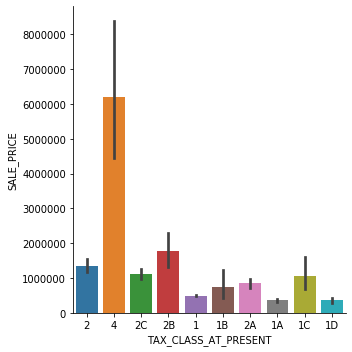

In [0]:
sns.catplot(x='TAX_CLASS_AT_PRESENT',y='SALE_PRICE',data=train,kind='bar')

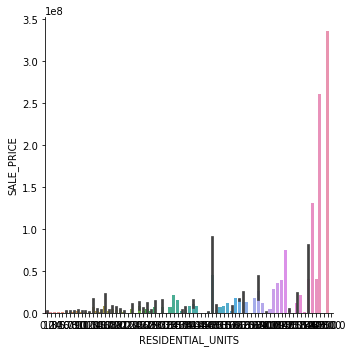

In [0]:
sns.catplot(x='RESIDENTIAL_UNITS',y='SALE_PRICE',data=train,kind='bar')

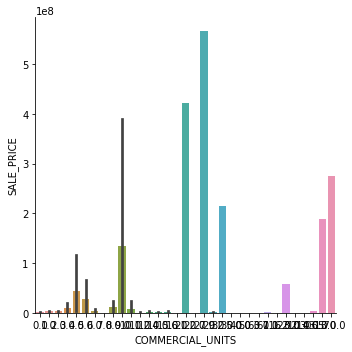

In [0]:
sns.catplot(x='COMMERCIAL_UNITS',y='SALE_PRICE',data=train,kind='bar')

In [0]:
def com(li):
  li = str(li).replace(',','')
  return(li)
train['LAND_SQUARE_FEET'] = train.LAND_SQUARE_FEET.apply(com)

C:\Users\WIN 10\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [0]:
train['LAND_SQUARE_FEET'] = train.LAND_SQUARE_FEET.astype(float)

C:\Users\WIN 10\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
df['LAND_SQUARE_FEET'] = df.LAND_SQUARE_FEET.apply(com)


In [0]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,716,1246,nan,R4,"447 WEST 18TH STREET, PH12A",PH12A,10011,1,0,1,10733,1979,2007,2,R4,0,2019-01-01
1,1,FASHION,21 OFFICE BUILDINGS,4,812,68,nan,O5,144 WEST 37TH STREET,NaN,10018,0,6,6,2962,15435,1920,4,O5,0,2019-01-01
2,1,FASHION,21 OFFICE BUILDINGS,4,839,69,nan,O5,40 WEST 38TH STREET,NaN,10018,0,7,7,2074,11332,1930,4,O5,0,2019-01-01
3,1,GREENWICH VILLAGE-WEST,13 CONDOS - ELEVATOR APARTMENTS,2,592,1041,nan,R4,"1 SHERIDAN SQUARE, 8C",8C,10014,1,0,1,0,500,0,2,R4,0,2019-01-01
4,1,UPPER EAST SIDE (59-79),15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,1379,1402,nan,R1,"20 EAST 65TH STREET, B",B,10065,1,0,1,0,6406,0,2,R1,0,2019-01-01


In [0]:
train.dtypes

BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING_CLASS_CATEGORY                   object
TAX_CLASS_AT_PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASE-MENT                                float64
BUILDING_CLASS_AT_PRESENT                 object
ADDRESS                                   object
APARTMENT_NUMBER                          object
ZIP_CODE                                 float64
RESIDENTIAL_UNITS                        float64
COMMERCIAL_UNITS                         float64
TOTAL_UNITS                              float64
LAND_SQUARE_FEET                         float64
GROSS_SQUARE_FEET                        float64
YEAR_BUILT                               float64
TAX_CLASS_AT_TIME_OF_SALE                  int64
BUILDING_CLASS_AT_TIME_OF_SALE            object
SALE_PRICE                                 int64
SALE_DATE           

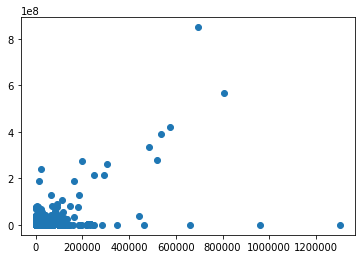

In [0]:
plt.scatter(train['GROSS_SQUARE_FEET'],train['SALE_PRICE'])

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
def make(df,y,x):
  X = df[x]
  y = df[y]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
  model = LinearRegression()
  model.fit(X_train,y_train)
  coef = model.coef_
  intercept = model.intercept_
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  r2score = r2_score(y_test,y_pred)
  r2score_train = r2_score(y_train, y_pred_train)
  print('Coef = ' +str(coef[0]) + '   intercept = '+str(intercept))
  print('')
  print('R-score for test '+str(r2score))
  print('R-score for train '+str(r2score_train))
  print('')
  print('MAE TEST ' + str(mean_absolute_error(y_test,y_pred)))
  print('MAE TRAIN ' + str(mean_absolute_error(y_train,y_pred_train)))


In [0]:
df.head(2)

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,716,1246,R4,"447 WEST 18TH STREET, PH12A",10011,1,0,1,10733,1979,2007,2,R4,0,2019-01-01
1,1,FASHION,21 OFFICE BUILDINGS,4,812,68,O5,144 WEST 37TH STREET,10018,0,6,6,2962,15435,1920,4,O5,0,2019-01-01


In [0]:
dff = df.fillna(df.mean())

In [0]:
features = ['YEAR_BUILT','COMMERCIAL_UNITS','GROSS_SQUARE_FEET','TAX_CLASS_AT_TIME_OF_SALE']
target = 'SALE_PRICE'
make(dff,target,features)

In [0]:
make(dff,target,features)

Coef = -108.95397247258751   intercept = -462978.3493258853

R-score for test 0.18378619487643288
R-score for train 0.2829241420584352

MAE TEST 1493002.5649587591
MAE TRAIN 1507631.4543878487


In [0]:
df.describe()

,BOROUGH,BLOCK,LOT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE
count,22938,22938,22938,22938,22938,22938,22938,22938,22938,22938,22938
mean,3,4467,350,10791,2,0,2,3422,1819,2,1318000
std,1,3716,627,1105,10,5,12,21921,489,1,10191487
min,1,1,1,0,0,0,0,0,0,1,0
25%,2,1345,21,10306,0,0,1,493,1920,1,0
50%,3,3559,49,11211,1,0,1,1356,1940,1,450000
75%,4,6678,327,11360,2,0,2,2280,1965,2,875000
max,5,16350,9057,11697,750,570,755,1303935,2019,4,850000000


In [0]:
df.ZIP_CODE.nunique()

184

In [0]:
import category_encoders as ce
encoder = ce.OneHotEncoder(use_cat_names=True)
encoded = encoder.fit_transform(train['BUILDING_CLASS_AT_TIME_OF_SALE'])

encodert = ce.OneHotEncoder(use_cat_names=True)
encodedt = encoder.fit_transform(test['BUILDING_CLASS_AT_TIME_OF_SALE'])

In [0]:
encoded.shape

(18129, 140)

In [0]:
train.shape

(18129, 19)

In [0]:
new_train = pd.concat([train,encoded],axis=1)
new_train.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,ZIP_CODE,RESIDENTIAL_UNITS,...,BUILDING_CLASS_AT_TIME_OF_SALE_RA,BUILDING_CLASS_AT_TIME_OF_SALE_G4,BUILDING_CLASS_AT_TIME_OF_SALE_V2,BUILDING_CLASS_AT_TIME_OF_SALE_H2,BUILDING_CLASS_AT_TIME_OF_SALE_P9,BUILDING_CLASS_AT_TIME_OF_SALE_W4,BUILDING_CLASS_AT_TIME_OF_SALE_W3,BUILDING_CLASS_AT_TIME_OF_SALE_I7,BUILDING_CLASS_AT_TIME_OF_SALE_H4,BUILDING_CLASS_AT_TIME_OF_SALE_K6
0,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,716,1246,R4,"447 WEST 18TH STREET, PH12A",10011,1,...,0,0,0,0,0,0,0,0,0,0
1,1,FASHION,21 OFFICE BUILDINGS,4,812,68,O5,144 WEST 37TH STREET,10018,0,...,0,0,0,0,0,0,0,0,0,0
2,1,FASHION,21 OFFICE BUILDINGS,4,839,69,O5,40 WEST 38TH STREET,10018,0,...,0,0,0,0,0,0,0,0,0,0
3,1,GREENWICH VILLAGE-WEST,13 CONDOS - ELEVATOR APARTMENTS,2,592,1041,R4,"1 SHERIDAN SQUARE, 8C",10014,1,...,0,0,0,0,0,0,0,0,0,0
4,1,UPPER EAST SIDE (59-79),15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,1379,1402,R1,"20 EAST 65TH STREET, B",10065,1,...,0,0,0,0,0,0,0,0,0,0


In [0]:
new_test = pd.concat([test,encodedt],axis=1)
new_test.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,ZIP_CODE,RESIDENTIAL_UNITS,...,BUILDING_CLASS_AT_TIME_OF_SALE_R5,BUILDING_CLASS_AT_TIME_OF_SALE_GU,BUILDING_CLASS_AT_TIME_OF_SALE_V9,BUILDING_CLASS_AT_TIME_OF_SALE_V3,BUILDING_CLASS_AT_TIME_OF_SALE_G6,BUILDING_CLASS_AT_TIME_OF_SALE_G9,BUILDING_CLASS_AT_TIME_OF_SALE_E2,BUILDING_CLASS_AT_TIME_OF_SALE_Z0,BUILDING_CLASS_AT_TIME_OF_SALE_J1,BUILDING_CLASS_AT_TIME_OF_SALE_D6
18167,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,695,1562,R4,"555 WEST 23RD STREET, N11E",10011,1,...,0,0,0,0,0,0,0,0,0,0
18168,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,767,1609,R4,"221 WEST 17TH STREET, 6A",10011,1,...,0,0,0,0,0,0,0,0,0,0
18169,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,767,1612,R4,"221 WEST 17TH STREET, PH3",10011,1,...,0,0,0,0,0,0,0,0,0,0
18170,1,CHELSEA,17 CONDO COOPS,2,721,1008,R9,"465 WEST 23RD STREET, RCU1",10011,0,...,0,0,0,0,0,0,0,0,0,0
18171,1,CHELSEA,21 OFFICE BUILDINGS,4,746,64,O8,340 WEST 23RD STREET,10011,3,...,0,0,0,0,0,0,0,0,0,0


In [0]:


X_train = train.drop(columns='SALE_PRICE')

y_train = train['SALE_PRICE']


X_test = test.drop(columns='SALE_PRICE')

y_test = test['SALE_PRICE']


In [0]:
X_train.shape

(18129, 164)

In [0]:
X_test.shape

(4809, 164)

In [0]:
def make(X_train,y_train,X_test, y_test,features):
  X_train  = X_train[features]
  X_test = X_test[features]
  y_train = y_train.values
  y_test = y_test.values
  model = LinearRegression()
  model.fit(X_train,y_train)
  coef = model.coef_
  intercept = model.intercept_
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  r2score = r2_score(y_test,y_pred)
  r2score_train = r2_score(y_train, y_pred_train)
  print('Coef = ' +str(coef[0]) + '   intercept = '+str(intercept))
  print('')
  print('R-score for test '+str(r2score))
  print('R-score for train '+str(r2score_train))
  print('')
  print('MAE TEST ' + str(mean_absolute_error(y_test,y_pred)))
  print('MAE TRAIN ' + str(mean_absolute_error(y_train,y_pred_train)))

In [0]:
make(X_train,y_train,X_test, y_test,features)

Coef = 271316.4522672334   intercept = -5203850.203181701

R-score for test -0.38961192691912383
R-score for train 0.7028261677043424

MAE TEST 1862392.4954799495
MAE TRAIN 1171743.7711781524


In [0]:
train.columns.to_list()

In [0]:
names = train.columns[19:165]
title = []
for i in names:
    title.append(i)
title

In [0]:
features = selected + title
features

In [0]:
model = LinearRegression()
model.fit(X_train[features],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
model.coef_
model.intercept_

-4528205.309713159

In [0]:
y_pred = model.predict(X_test)

ValueError: shapes (4809,110) and (150,) not aligned: 110 (dim 1) != 150 (dim 0)

In [0]:
d

In [0]:
from sklearn.feature_selection import f_regression, SelectKBest

# Similar API to what we've seen before
selector = SelectKBest(score_func=f_regression, k=5)

# IMPORTANT!
# .fit_transform on the train set
# .transform on test set
X_train_selected = selector.fit_transform(X_train.select_dtypes('number'), y_train)
X_test_selected = selector.transform(X_test.select_dtypes('number'))
X_train_selected.shape, X_test_selected.shape

((18129, 5), (4809, 5))

In [0]:
X_train.select_dtypes('number').columns

Index(['BOROUGH', 'BLOCK', 'LOT', 'ZIP_CODE', 'RESIDENTIAL_UNITS',
       'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE'],
      dtype='object')

In [0]:
all_names = X_train.columns
selected_mask = selector.get_support()
selected_names = all_names[selected_mask]
unselected_names = all_names[~selected_mask]

print('Features selected:')
for name in selected_names:
    print(name)
    
print('\nFeatures not selected:')
for name in unselected_names:
    print(name)

Features selected:
RESIDENTIAL_UNITS
COMMERCIAL_UNITS
TOTAL_UNITS
GROSS_SQUARE_FEET
TAX_CLASS_AT_TIME_OF_SALE

Features not selected:
BOROUGH
BLOCK
LOT
ZIP_CODE
YEAR_BUILT


In [0]:
selected_names

Index(['RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'GROSS_SQUARE_FEET', 'TAX_CLASS_AT_TIME_OF_SALE'],
      dtype='object')

In [0]:
selected = []
for i in selected_names:
    selected.append(i)
selected

['RESIDENTIAL_UNITS',
 'COMMERCIAL_UNITS',
 'TOTAL_UNITS',
 'GROSS_SQUARE_FEET',
 'TAX_CLASS_AT_TIME_OF_SALE']

In [0]:
!pip install category_encoders

In [0]:
import category_encoders as ce
encoder = ce.OneHotEncoder(use_cat_names=True)
encoded = encoder.fit_transform(train['BUILDING_CLASS_AT_TIME_OF_SALE'])
encoded.head()

,BUILDING_CLASS_AT_TIME_OF_SALE_R4,BUILDING_CLASS_AT_TIME_OF_SALE_O5,BUILDING_CLASS_AT_TIME_OF_SALE_R1,BUILDING_CLASS_AT_TIME_OF_SALE_C4,BUILDING_CLASS_AT_TIME_OF_SALE_A1,BUILDING_CLASS_AT_TIME_OF_SALE_A5,BUILDING_CLASS_AT_TIME_OF_SALE_B1,BUILDING_CLASS_AT_TIME_OF_SALE_V0,BUILDING_CLASS_AT_TIME_OF_SALE_G7,BUILDING_CLASS_AT_TIME_OF_SALE_I9,...,BUILDING_CLASS_AT_TIME_OF_SALE_RA,BUILDING_CLASS_AT_TIME_OF_SALE_G4,BUILDING_CLASS_AT_TIME_OF_SALE_V2,BUILDING_CLASS_AT_TIME_OF_SALE_H2,BUILDING_CLASS_AT_TIME_OF_SALE_P9,BUILDING_CLASS_AT_TIME_OF_SALE_W4,BUILDING_CLASS_AT_TIME_OF_SALE_W3,BUILDING_CLASS_AT_TIME_OF_SALE_I7,BUILDING_CLASS_AT_TIME_OF_SALE_H4,BUILDING_CLASS_AT_TIME_OF_SALE_K6
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
X_train.head()

,BOROUGH,BLOCK,LOT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE
0,1,716,1246,10011,1,0,1,1979,2007,2
1,1,812,68,10018,0,6,6,15435,1920,4
2,1,839,69,10018,0,7,7,11332,1930,4
3,1,592,1041,10014,1,0,1,500,0,2
4,1,1379,1402,10065,1,0,1,6406,0,2


In [0]:
from sklearn.preprocessing import StandardScaler


X_train_encoded = encoder.fit_transform(X_train)
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [0]:
X_train_encoded.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,ZIP_CODE,RESIDENTIAL_UNITS,...,BUILDING_CLASS_AT_TIME_OF_SALE_G4,BUILDING_CLASS_AT_TIME_OF_SALE_V2,BUILDING_CLASS_AT_TIME_OF_SALE_H2,BUILDING_CLASS_AT_TIME_OF_SALE_P9,BUILDING_CLASS_AT_TIME_OF_SALE_W4,BUILDING_CLASS_AT_TIME_OF_SALE_W3,BUILDING_CLASS_AT_TIME_OF_SALE_I7,BUILDING_CLASS_AT_TIME_OF_SALE_H4,BUILDING_CLASS_AT_TIME_OF_SALE_K6,SALE_DATE
0,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,716,1246,R4,"447 WEST 18TH STREET, PH12A",10011,1,...,0,0,0,0,0,0,0,0,0,2019-01-01
1,1,FASHION,21 OFFICE BUILDINGS,4,812,68,O5,144 WEST 37TH STREET,10018,0,...,0,0,0,0,0,0,0,0,0,2019-01-01
2,1,FASHION,21 OFFICE BUILDINGS,4,839,69,O5,40 WEST 38TH STREET,10018,0,...,0,0,0,0,0,0,0,0,0,2019-01-01
3,1,GREENWICH VILLAGE-WEST,13 CONDOS - ELEVATOR APARTMENTS,2,592,1041,R4,"1 SHERIDAN SQUARE, 8C",10014,1,...,0,0,0,0,0,0,0,0,0,2019-01-01
4,1,UPPER EAST SIDE (59-79),15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,1379,1402,R1,"20 EAST 65TH STREET, B",10065,1,...,0,0,0,0,0,0,0,0,0,2019-01-01


In [0]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

for k in range(1, len(X_train_encoded.columns)+1):
    print(f'{k} features')
    
    selector = SelectKBest(score_func=f_regression, k=k)
    X_train_selected = selector.fit_transform(X_train_scaled, y_train)
    X_test_selected = selector.transform(X_test_scaled)
    
    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    
    y_pred = model.predict(X_test_selected)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Test MAE: ${mae:,.0f} \n')